# Práctica Text Mining K-Means con tfidf

# RESOLUCIÓN DEL CASO PRÁCTICO


1.- Cargamos el corpus de textos [20newsgroups](http://qwone.com/~jason/20Newsgroups/) y del mismo seleccionamos 2 grupos de noticias: 'alt.atheism'y 'sci.space' (de las 20 existentes)


In [55]:
#Cargamos el corpus "20newsgroups" señalado en el ejercicio:
from sklearn.datasets import fetch_20newsgroups
#Importamos el método de clusterización KMeans:
from sklearn.cluster import KMeans
#Importamos el método 'tiempo'
from time import time
#Importamos numpy
import numpy as np

#Utilizamos 2 clases/categorias dentro del corpus "20newsgroups" cargado: 'atheism' y 'space'
categories = 'alt.atheism','sci.space'

print("Cargamos las categorías del dataset 20newsgroups:", categories)
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
print('Número de documentos cargados del dataset 20newsgroups para esas 2 categorias:',"%d documentos" % len(dataset.data))
#print()
labels = dataset.target
print (dataset.target)
#seleccionamos manualmente el número de clústers (k)
k = 8
#He comprobado que es el número más adecuado al ofrecer unas mejores medidas de ajuste junto al resto de parámetros seleccionados
print ('Número de clusters:', k)

Cargamos las categorías del dataset 20newsgroups: ('alt.atheism', 'sci.space')
Número de documentos cargados del dataset 20newsgroups para esas 2 categorias: 1786 documentos
[0 0 1 ..., 1 1 0]
Número de clusters: 8



2.- Vectorizamos los textos del corpus (convertimos cada texto en un vector de frecuencias de palabras)


In [56]:
#Importamos el vectorizador tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=5)
#vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset.data) #El vectorizador aprende el vocabulario del corpus
#print("tiempo empleado: %fs" % (time() - t0), ", numero de ejemplos: %d, numero de campos: %d" % X.shape)
#Transformamos los documentos en una matriz de tf's de documentos que es nuestro dataset, donde:
# - cada fila representa una muestra (un documento del corpus)
# - cada columna representa un atributo (la frecuencia de una palabra en dicho documento)
print()
print("Vectorizamos los textos y mostramos la Matriz tf:")
print (X.toarray())
print()

print("Mostramos el tamaño del análisis...", "nº de muestras: %d, nº de atributos: %d" % X.shape)


Vectorizamos los textos y mostramos la Matriz tf:
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]

Mostramos el tamaño del análisis... nº de muestras: 1786, nº de atributos: 15500



3.- Clusterizamos los documentos mediante el algoritmo K-means, donde los parámetros: 
- *n_clusters* : int, optional, default: 8 (The number of clusters to form as well as the number of centroids to generate). 
- *max_iter* : int, default: 100 (Maximum number of iterations of the k-means algorithm for a single run). 
- *n_init*: int, default: 10 (Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia). 
- *init*: {‘k-means++’, ‘random’ or an ndarray} Method for initialization, defaults to ‘k-means++’ (‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.‘random’: choose k observations (rows) at random from data for the initial centroids). 
- *verbose* : int, default 0 (Verbosity mode).



In [57]:
#Aplicamos el método de clusterización "K-Means"
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1,verbose=5)
#km = KMeans(n_clusters=k,max_iter=100)
#las iteraciones paran cuando se minimiza la inercia 
t0 = time()
km.fit(X)
print("tiempo empleado: %0.3fs" % (time() - t0))
print()
#Mostramos los clústers
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

print ("Mostramos los Clusters conformados")
for i in range(k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
          print(' %s' % terms[ind], end='')
    print()

Initialization complete
Iteration  0, inertia 3226.611
Iteration  1, inertia 1697.062
Iteration  2, inertia 1688.864
Iteration  3, inertia 1684.502
Iteration  4, inertia 1680.799
Iteration  5, inertia 1679.243
Iteration  6, inertia 1678.108
Iteration  7, inertia 1677.130
Iteration  8, inertia 1677.049
Converged at iteration 8: center shift 0.000000e+00 within tolerance 6.317085e-09
tiempo empleado: 1.139s

Mostramos los Clusters conformados
Cluster 0: sandvik ico vice tek com bobbe kent beauchaine apple newton
Cluster 1: sgi livesey solntze wpd jon com fido keith caltech asd
Cluster 2: space sci cmu cs digest isu venari international vacation tom
Cluster 3: keith caltech cwru kmr4 schneider po allan cco ryan morality
Cluster 4: henry access toronto digex pat zoo spencer net zoology prb
Cluster 5: islam jaeger rushdie bu gregg islamic monash muslim buphy law
Cluster 6: space nasa gov com moon alaska like just earth shuttle
Cluster 7: god people atheism say don believe uk atheists religi


4.- Mostramos en un gráfico bidimensional la distribución de los puntos


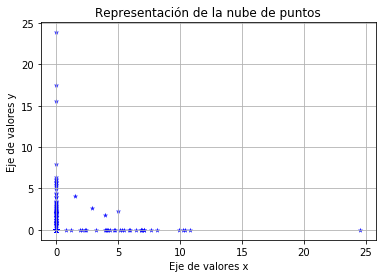

In [63]:
#Estandarizamos los valores de X para una mejor representación
from sklearn.preprocessing import StandardScaler
X_estandar = StandardScaler(with_mean=False).fit_transform(X)
#importamos el módulo matplotlib para realizar las gráficas
import matplotlib.pyplot as plt
%matplotlib inline
#Definimos parámetros del gráfico de tipo nube de puntos y lo mostramos
plt.scatter(X_estandar.toarray()[:,0], X_estandar.toarray()[:,1], color="blue", marker='*', s=30, lw=0, alpha=0.9)
plt.title("Representación de la nube de puntos")
plt.xlabel("Eje de valores x")
plt.ylabel("Eje de valores y")
plt.grid(True)
plt.show()


5.- Medimos la calidad de nuestro proceso de clusterización con diferentes métricas


In [59]:
from sklearn import metrics
#Medimos la calidad de nuestro procedimiento de clusterización

#Un cluster es homogéneo/homogeneity si todos sus elementos contienen miembros de una misma clase
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))

#Una clase es íntegra/completeness si todos sus elementos pertenecen al mismo cluster
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))

#V-measure es la media armónica entre la homogeneidad y la integridad:
#v-measure = 2 * (homogeneity * completeness) / (homogeneity + completeness)
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))

#El Silhouette Coefficient se calcula usando la distancia intra-clúster media (a) y la distancia media del clúster más próxima (b) para cada muestra.
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_))
#print()

Homogeneity: 0.898
Completeness: 0.373
V-measure: 0.527


Los datos de calidad son adecuados para la muestra con la que hemos trabajado (1550 elementos gestionados en 8 clusters). El dato de homogeneidad es alto (0,898) lo que indica que los elementos que componen cada cluster son muy similares entre ellos. En un proceso de clusterización se busca este hecho y que, además, los distintos clúster sean los más heterogéneos posible entre ellos.


6.- Usamos los clusters previos para clasificar 2 nuevos textos entrantes (uno suyo contexto es el ateísmo, y otro el viaje espacial hacia la luna), con el objeto de comprobar si las predicciones se corresponden con los clusters creados.


In [60]:
print("Clasificamos 2 nuevos textos:")
print ()
testCorpus = ["Atheism remains one of the most extreme taboos in Saudi Arabia. It is a red line that no one can cross. Atheists in Saudi Arabia have been suffering from imprisonment, maginalisation, slander, ostracisation and even execution. Atheists are considered terrorists. Efforts for normalisation between those who believe and those who don’t remain bleak in the kingdom. Despite constant warnings of Saudi religious authorities of “the danger of atheism,” many citizens in the kingdom are turning their backs on Islam. The Saudi dehumanizing strict laws in the name of Islam, easy access to information and mass communication are the primary driving forces pushing Saudis to leave religion. Unfortunately, those who explicitly do, find themselves harshly punished or forced to live dual lives."]
testCorpus2 = ["The man speaking was Neil Armstrong, whose brevity marked the moment when the lunar module Eagle completed its perilous journey from Apollo 11 and touched down upon the surface of the Moon. The world waited on tenterhooks as hour after hour of checks were carried out. Finally, the hatch opened, and Armstrong descended the ladder to become the first human to set foot on the Moon, with the now immortal words: That’s one small step for man, one giant leap for mankind.There cannot be many who have not, however briefly, glanced at the Moon and wondered what it must have been like for Armstrong to look back at the blue and green planet we call home. The landing may have happened almost five decades ago, but space exploration has not lost its allure. Even those of us who were not born when this momentous event unfolded are caught in its gravitational pull. With this in mind, it seems only fitting that Sotheby’s New York has decided to host its first space exploration auction, featuring memorabilia from American-led space missions, exactly 48 years to the day after Apollo 11’s lunar landing."]
tfMatrixTest =  vectorizer.transform(testCorpus)
tfMatrixTest2 =  vectorizer.transform(testCorpus2)

print ("TEXTO 1 (sobre el ateísmo en Arabia Saudí):",testCorpus)
print ()
print ("TEXTO 2 (sobre la llegada del hombre a la luna):",testCorpus2)
print ()
print ("Nueva matriz tf1:",tfMatrixTest.toarray() )
print ("Nueva matriz tf2:",tfMatrixTest2.toarray() )
print ()
prediction = km.predict(tfMatrixTest)[0]
print ("Prediccion Texto 1 (sobre el ateísmo): Cluster",prediction)
prediction2 = km.predict(tfMatrixTest2)[0]
print ("Prediccion Texto 2 (sobre la llegada del hombre a la luna): Cluster",prediction2)


Clasificamos 2 nuevos textos:

TEXTO 1 (sobre el ateísmo en Arabia Saudí): ['Atheism remains one of the most extreme taboos in Saudi Arabia. It is a red line that no one can cross. Atheists in Saudi Arabia have been suffering from imprisonment, maginalisation, slander, ostracisation and even execution. Atheists are considered terrorists. Efforts for normalisation between those who believe and those who don’t remain bleak in the kingdom. Despite constant warnings of Saudi religious authorities of “the danger of atheism,” many citizens in the kingdom are turning their backs on Islam. The Saudi dehumanizing strict laws in the name of Islam, easy access to information and mass communication are the primary driving forces pushing Saudis to leave religion. Unfortunately, those who explicitly do, find themselves harshly punished or forced to live dual lives.']

TEXTO 2 (sobre la llegada del hombre a la luna): ['The man speaking was Neil Armstrong, whose brevity marked the moment when the luna

Vemos que el sistema acierta en los 2 casos. Y es que:

- Cluster 6: space nasa gov com moon alaska like just earth shuttle (enmarcado en el contexto, espacial, adecuado)
- Cluster 7: god people atheism say don believe uk atheists religion bible (enmarcado en el contexto, ateísmo, adecuado)